In [22]:
import scanpy as sc
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import time
from gprofiler import GProfiler

# scTRS tools
import scTRS.util as util
import scTRS.data_loader as dl

# autoreload
%load_ext autoreload
%autoreload 2
# logging
sc.logging.print_versions()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.19.0 scipy==1.5.1 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1


In [3]:
# Setup file paths
DATA_PATH = '/n/home11/mjzhang/scTRS_data'
# Please change this to your own path
RESULT_PATH = '/n/home11/mjzhang/gwas_informed_scRNAseq/results'

### Load TMS data 

# load_tms_processed: load facs data, tissue=[Aorta, BAT, Bladder, Brain_Myeloid, Brain_Non-Myeloid, Diaphragm, GAT, Heart, Kidney, Large_Intestine, Limb_Muscle, Liver, Lung, MAT, Mammary_Gland, Marrow, Pancreas, SCAT, Skin, Spleen, Thymus, Tongue, Trachea]
# TMS facs Aorta: n_cell=906, n_gene=22966


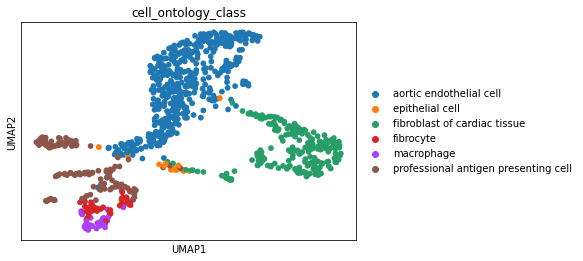

# TMS facs BAT: n_cell=2223, n_gene=22966


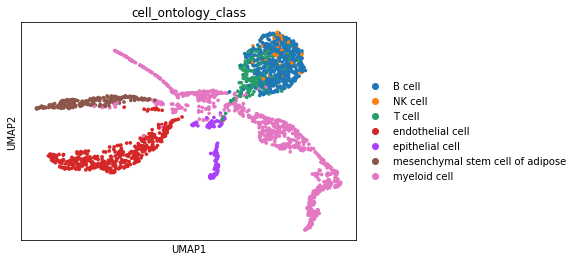

# TMS facs Bladder: n_cell=2432, n_gene=22966


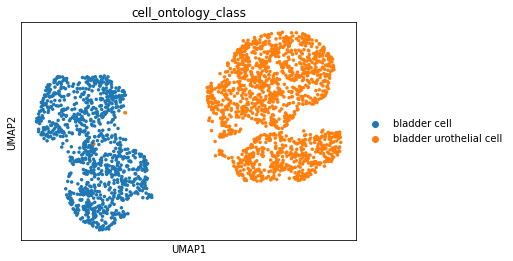

# TMS facs Brain_Myeloid: n_cell=13417, n_gene=22966


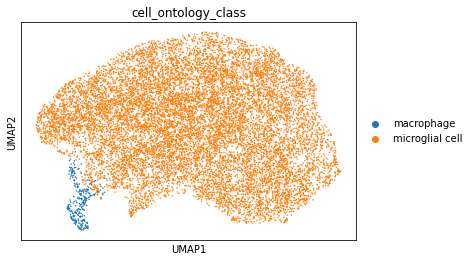

# TMS facs Brain_Non-Myeloid: n_cell=7249, n_gene=22966


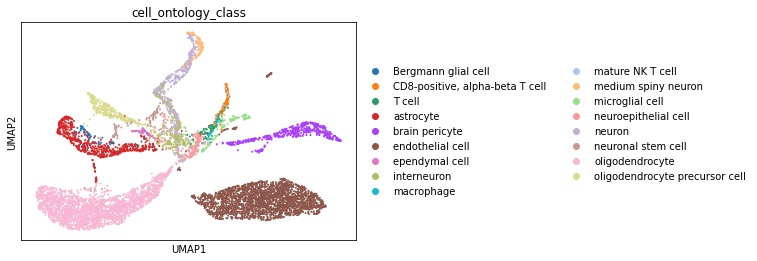

# TMS facs Diaphragm: n_cell=1858, n_gene=22966


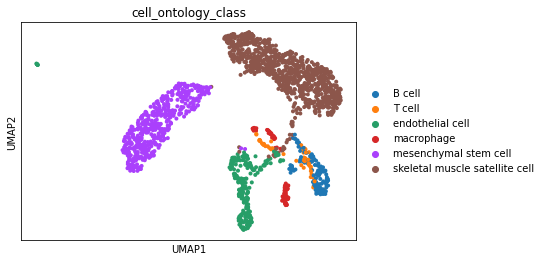

# TMS facs GAT: n_cell=3406, n_gene=22966


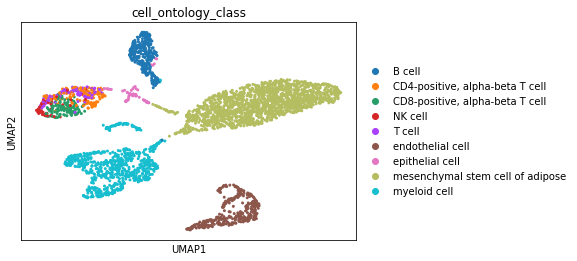

# TMS facs Heart: n_cell=9669, n_gene=22966


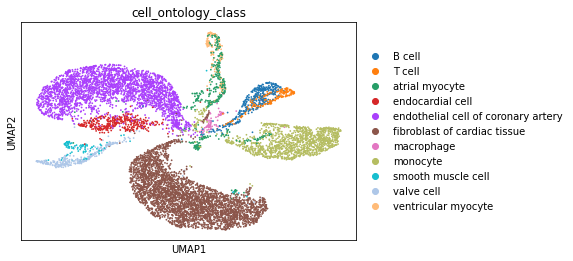

# TMS facs Kidney: n_cell=1833, n_gene=22966


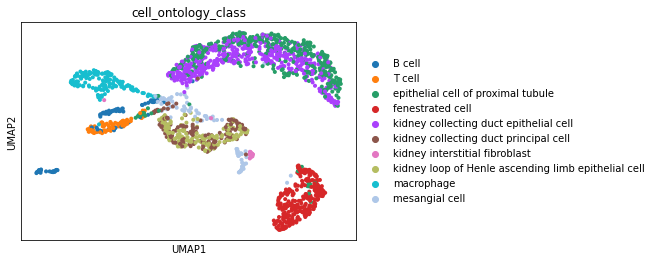

# TMS facs Large_Intestine: n_cell=8311, n_gene=22966


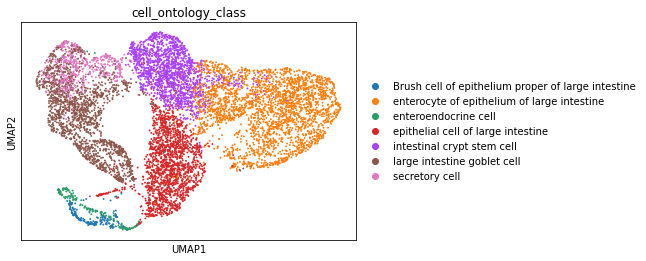

# TMS facs Limb_Muscle: n_cell=3855, n_gene=22966


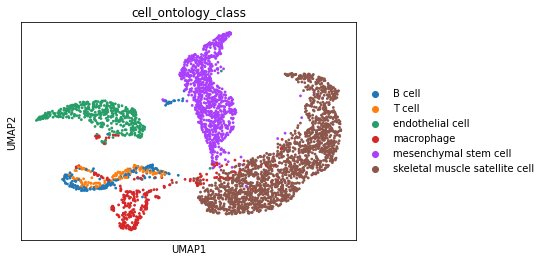

# TMS facs Liver: n_cell=2859, n_gene=22966


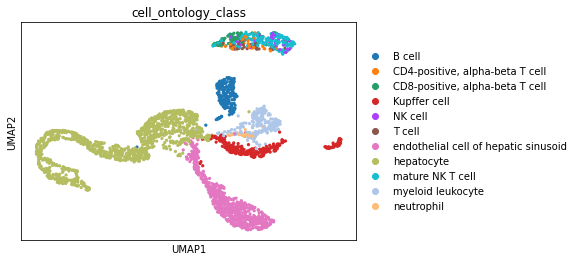

# TMS facs Lung: n_cell=5218, n_gene=22966


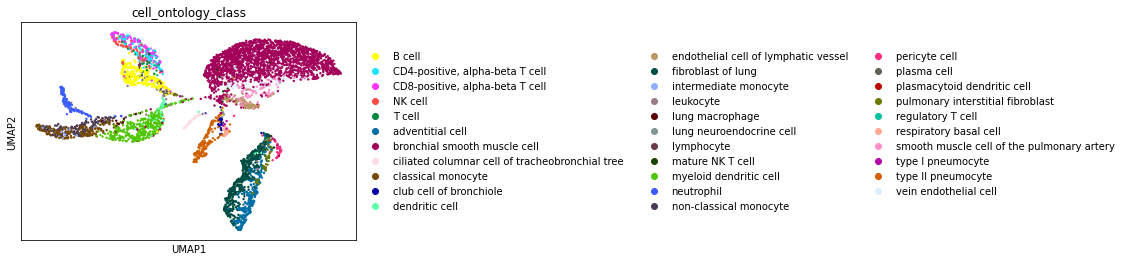

# TMS facs MAT: n_cell=3014, n_gene=22966


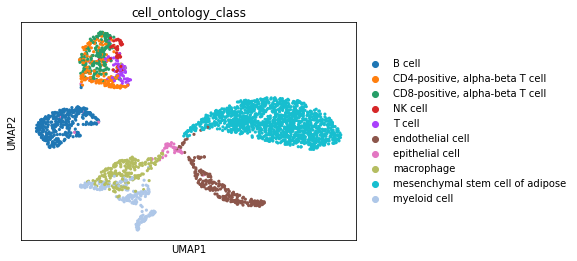

# TMS facs Mammary_Gland: n_cell=3282, n_gene=22966


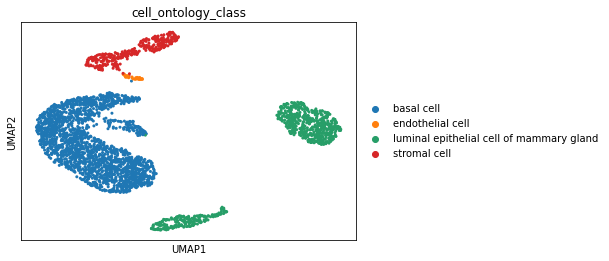

# TMS facs Marrow: n_cell=14517, n_gene=22966


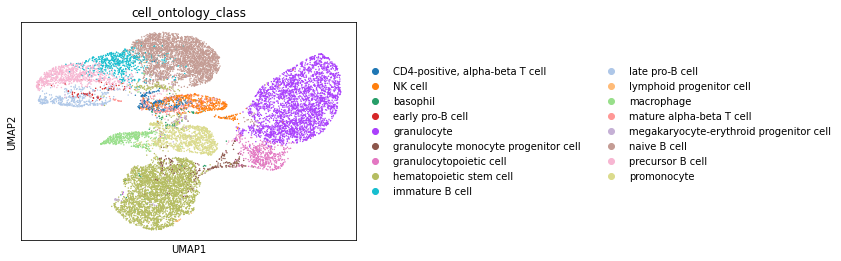

# TMS facs Pancreas: n_cell=3384, n_gene=22966


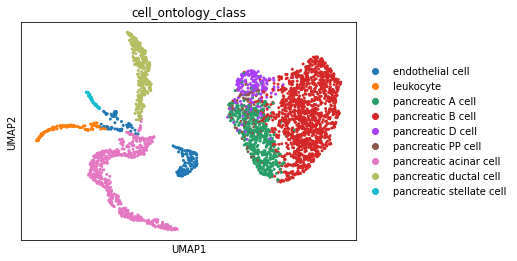

# TMS facs SCAT: n_cell=3755, n_gene=22966


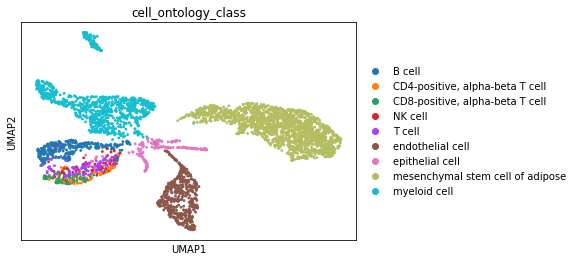

# TMS facs Skin: n_cell=4860, n_gene=22966


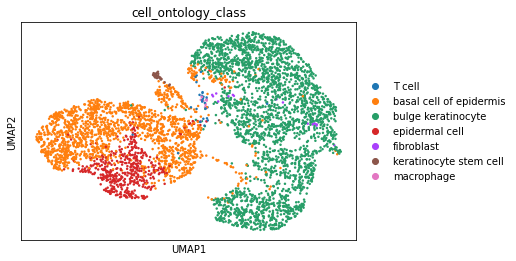

# TMS facs Spleen: n_cell=3834, n_gene=22966


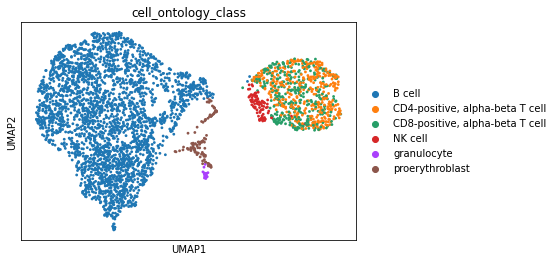

# TMS facs Thymus: n_cell=4047, n_gene=22966


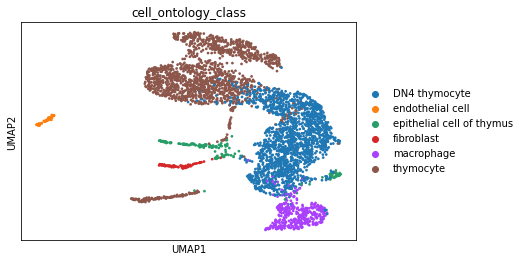

# TMS facs Tongue: n_cell=3735, n_gene=22966


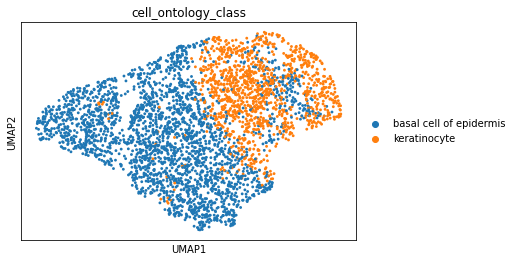

# TMS facs Trachea: n_cell=3160, n_gene=22966


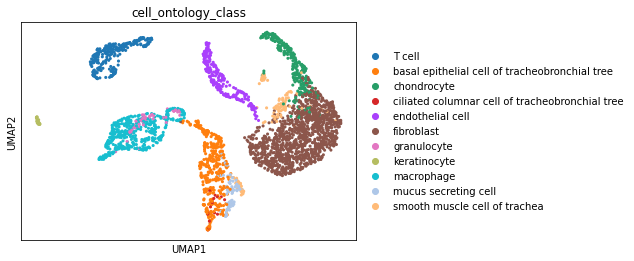

# time=174.0s


In [23]:
start_time = time.time()
dic_data_facs = dl.load_tms_processed(DATA_PATH, data_name='facs', tissue='all')
for tissue in dic_data_facs.keys():
    print('# TMS facs %s: n_cell=%d, n_gene=%d'
          %(tissue, dic_data_facs[tissue].shape[0], dic_data_facs[tissue].shape[1]))
    sc.pl.umap(dic_data_facs[tissue], color='cell_ontology_class')
print('# time=%0.1fs'%(time.time() - start_time))

# load_tms_processed: load droplet data, tissue=[Bladder, Fat, Heart_and_Aorta, Kidney, Large_Intestine, Limb_Muscle, Liver, Lung, Mammary_Gland, Marrow, Pancreas, Skin, Spleen, Thymus, Tongue, Trachea]
# TMS droplet Bladder: n_cell=8945, n_gene=20138


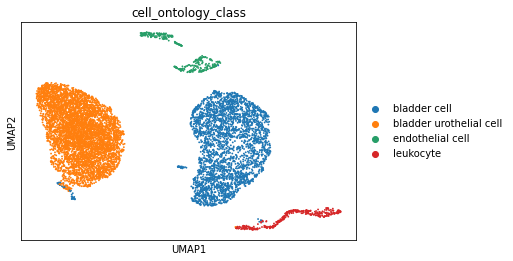

# TMS droplet Fat: n_cell=6777, n_gene=20138


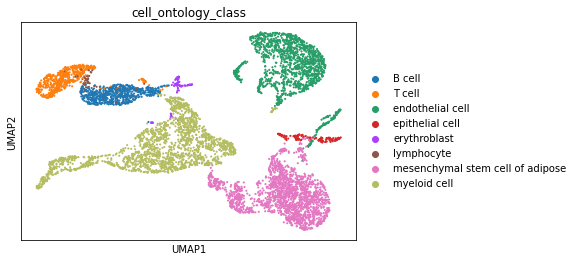

# TMS droplet Heart_and_Aorta: n_cell=8613, n_gene=20138


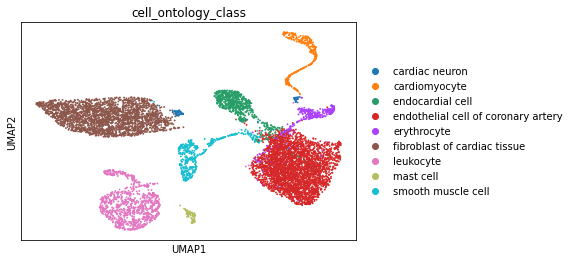

# TMS droplet Kidney: n_cell=21647, n_gene=20138


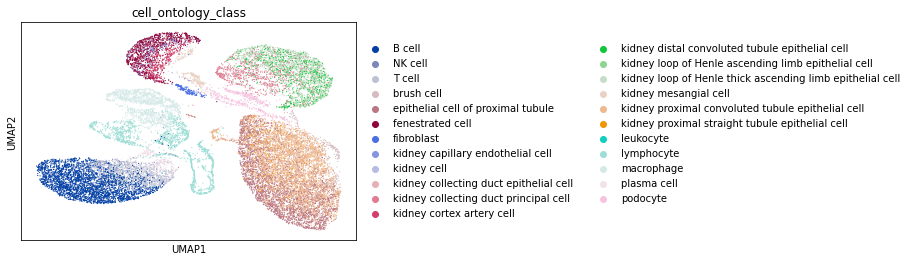

# TMS droplet Large_Intestine: n_cell=1887, n_gene=20138


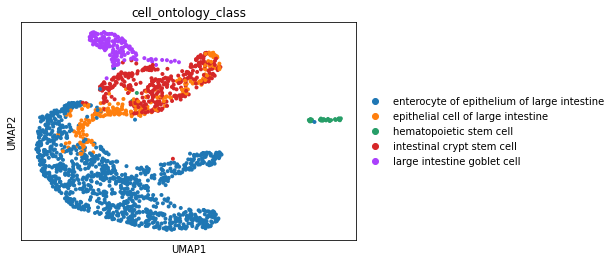

# TMS droplet Limb_Muscle: n_cell=28867, n_gene=20138


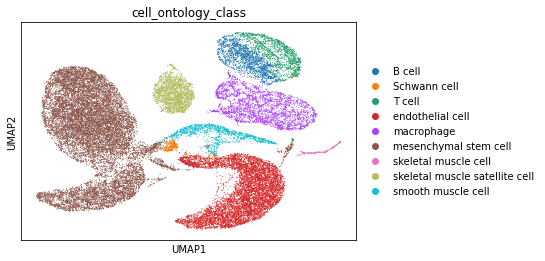

# TMS droplet Liver: n_cell=7294, n_gene=20138


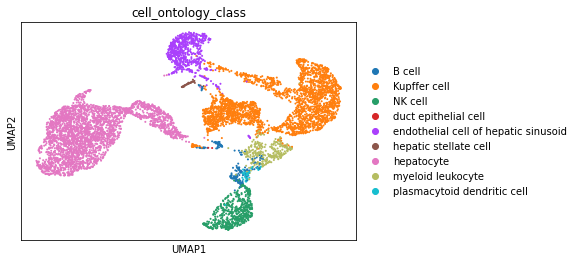

# TMS droplet Lung: n_cell=24540, n_gene=20138


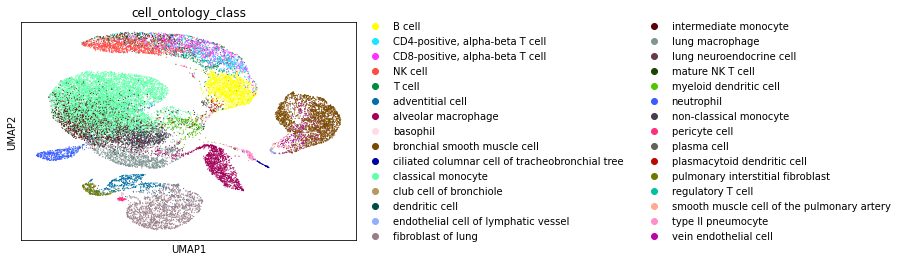

# TMS droplet Mammary_Gland: n_cell=12295, n_gene=20138


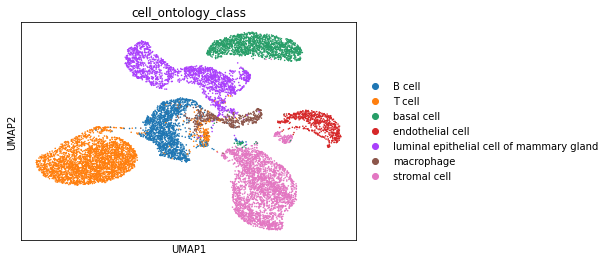

# TMS droplet Marrow: n_cell=40220, n_gene=20138


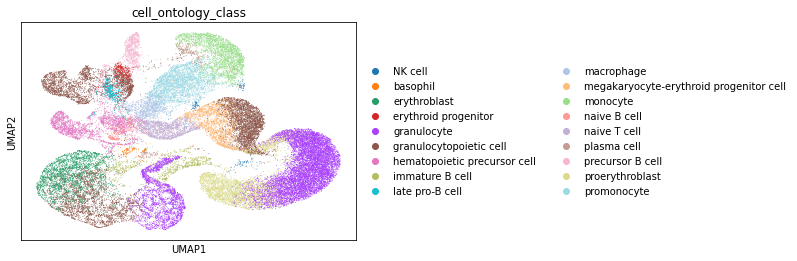

# TMS droplet Pancreas: n_cell=6201, n_gene=20138


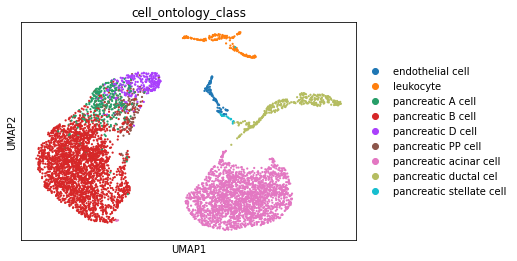

# TMS droplet Skin: n_cell=4454, n_gene=20138


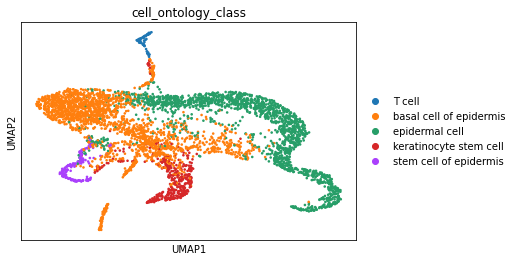

# TMS droplet Spleen: n_cell=35718, n_gene=20138


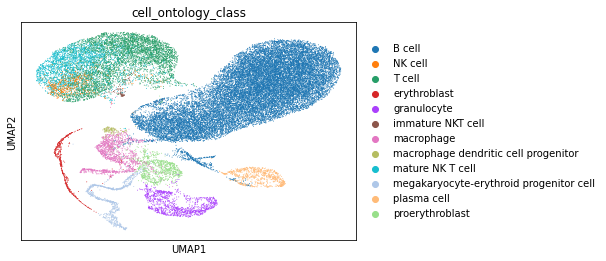

# TMS droplet Thymus: n_cell=9275, n_gene=20138


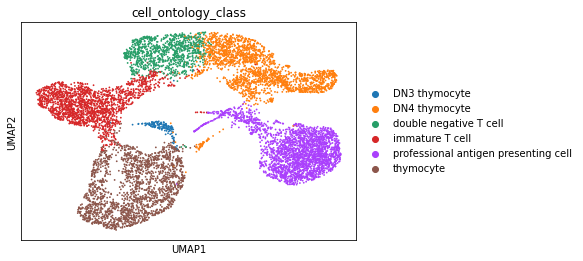

# TMS droplet Tongue: n_cell=20680, n_gene=20138


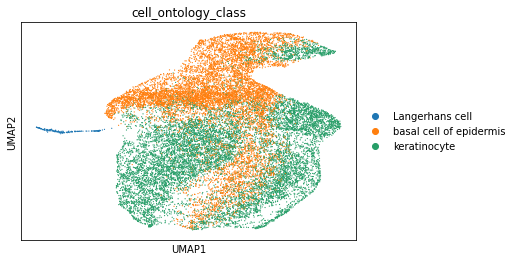

# TMS droplet Trachea: n_cell=7976, n_gene=20138


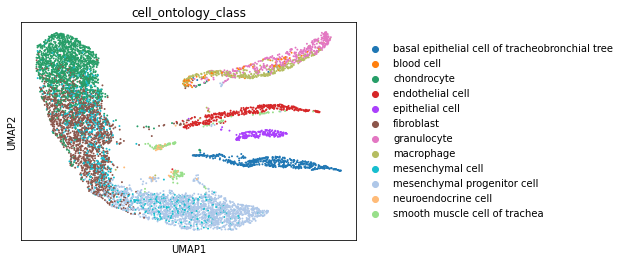

# time=379.4s


In [24]:
start_time = time.time()
dic_data_droplet = dl.load_tms_processed(DATA_PATH, data_name='droplet', tissue='all')
for tissue in dic_data_droplet.keys():
    print('# TMS droplet %s: n_cell=%d, n_gene=%d'
          %(tissue, dic_data_droplet[tissue].shape[0], dic_data_droplet[tissue].shape[1]))
    sc.pl.umap(dic_data_droplet[tissue], color='cell_ontology_class')
print('# time=%0.1fs'%(time.time() - start_time))

### Load gene annotation

In [31]:
# Get 64 independent traits 
df_sumstats_meta = pd.read_excel(DATA_PATH+'/sumstats/Description_080419.xlsx',
                                 sheet_name='64 Recommended indepent traits')
df_sumstats_meta = df_sumstats_meta[['Trait_Identifier', 'h2g', 'Z', 'N']]

In [57]:
# MAGMA gene annotation
df_geneannot = pd.read_csv(DATA_PATH+'/gene_annotation/Genes_by_X_kushal/Genes_by_X_MAGMA_10kb_Z.txt', sep='\t')
print('# MAGMA annotation: n_gene=%d, n_trait=%d'%(df_geneannot.shape[0], df_geneannot.shape[1]))

# Ortholog genes 
# (computed using following two lines of codes, stored to void dulplicated computation )
# gp = GProfiler(return_dataframe=True)
# df_orth = gp.orth(organism='hsapiens', query=list(df_geneannot.index), target='mmusculus')
df_orth = pd.read_csv(DATA_PATH+'/gene_annotation/Genes_by_X_kushal/Genes_by_X_MAGMA_10kb_Z.orth.txt', sep='\t')

# Use only human genes that can be uniquely mapped to a mouse gene
temp_df = df_orth.groupby(['incoming']).agg({'name':len})
gene_list = list(temp_df.index[temp_df['name']==1])
gene_list.sort()
df_orth.index = df_orth['incoming']
df_orth = df_orth.loc[gene_list]
print('# MAGMA annotation: n_mouse_gene_converted=%d'%(df_orth.shape[0]))

# Change df_geneannot genes to mouse genes
dic_mapping = {df_orth['incoming'].values[x]:df_orth['name'].values[x] for x in np.arange(df_orth.shape[0])}
df_geneannot = df_geneannot.loc[gene_list]
df_geneannot.index = [dic_mapping[x] for x in df_geneannot.index]

# MAGMA annotation: n_gene=19427, n_trait=169
# MAGMA annotation: n_mouse_gene_converted=15832


### A naive scoring 

In [67]:
dic_data_facs.keys()

dict_keys(['Aorta', 'BAT', 'Bladder', 'Brain_Myeloid', 'Brain_Non-Myeloid', 'Diaphragm', 'GAT', 'Heart', 'Kidney', 'Large_Intestine', 'Limb_Muscle', 'Liver', 'Lung', 'MAT', 'Mammary_Gland', 'Marrow', 'Pancreas', 'SCAT', 'Skin', 'Spleen', 'Thymus', 'Tongue', 'Trachea'])

In [74]:
blood_trait_list = [x for x in df_geneannot.columns 
                    if ('blood' in x) & (x in df_sumstats_meta['Trait_Identifier'].values)]
tissue_list = ['Marrow', 'Brain_Non-Myeloid', 'Spleen', 'Skin']
# A naive way to score cells 
for trait in blood_trait_list:
    gene_list = df_geneannot.index[np.absolute(df_geneannot[trait])>5]
    for tissue in tissue_list:
        temp_gene_list = list(set(gene_list) & set(dic_data_facs[tissue].var_names))
        dic_data_facs[tissue].obs['TRS_%s'%trait] = dic_data_facs[tissue][:,temp_gene_list].X.sum(axis=1)
        print('# trait=%-40s tissue=%-20s n_gene=%d'%(trait, tissue, len(temp_gene_list)))

# trait=UKB_460K.blood_PLATELET_COUNT            tissue=Marrow               n_gene=2212
# trait=UKB_460K.blood_PLATELET_COUNT            tissue=Brain_Non-Myeloid    n_gene=2212
# trait=UKB_460K.blood_PLATELET_COUNT            tissue=Spleen               n_gene=2212
# trait=UKB_460K.blood_PLATELET_COUNT            tissue=Skin                 n_gene=2212
# trait=UKB_460K.blood_RBC_DISTRIB_WIDTH         tissue=Marrow               n_gene=1362
# trait=UKB_460K.blood_RBC_DISTRIB_WIDTH         tissue=Brain_Non-Myeloid    n_gene=1362
# trait=UKB_460K.blood_RBC_DISTRIB_WIDTH         tissue=Spleen               n_gene=1362
# trait=UKB_460K.blood_RBC_DISTRIB_WIDTH         tissue=Skin                 n_gene=1362
# trait=UKB_460K.blood_RED_COUNT                 tissue=Marrow               n_gene=1564
# trait=UKB_460K.blood_RED_COUNT                 tissue=Brain_Non-Myeloid    n_gene=1564
# trait=UKB_460K.blood_RED_COUNT                 tissue=Spleen               n_gene=1564
# trait=UKB_460K.bloo

Marrow


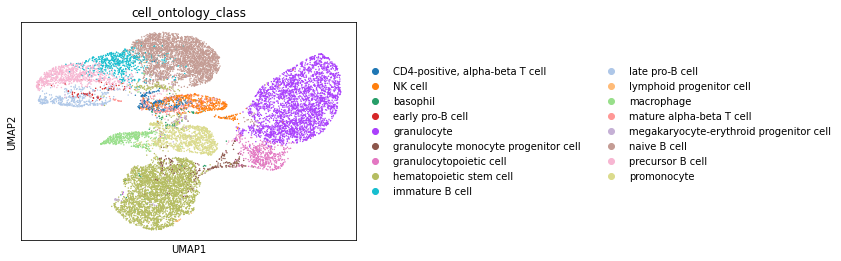

Marrow


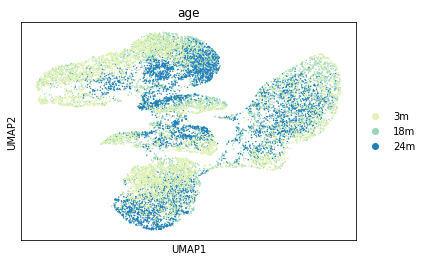

Marrow


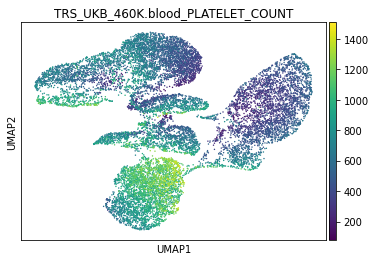

Marrow


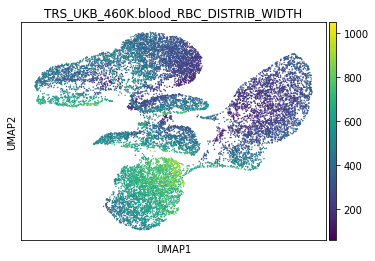

Marrow


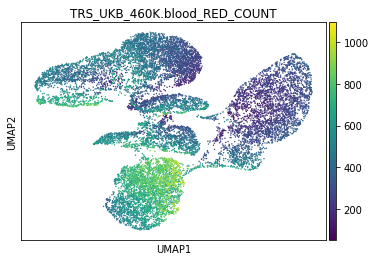

Marrow


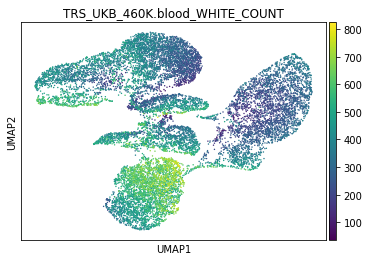

Brain_Non-Myeloid


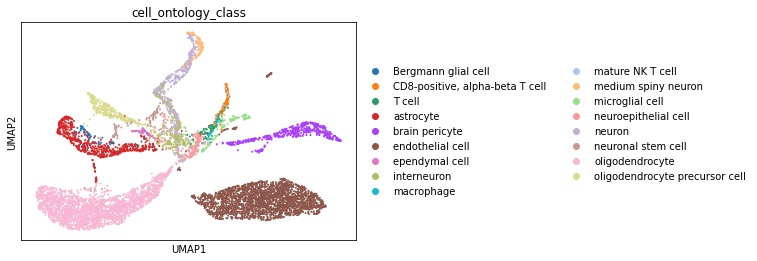

Brain_Non-Myeloid


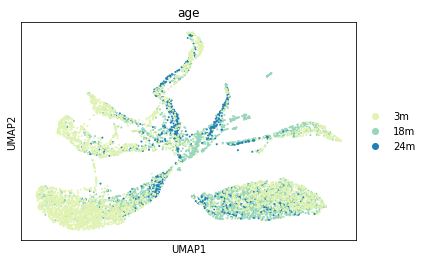

Brain_Non-Myeloid


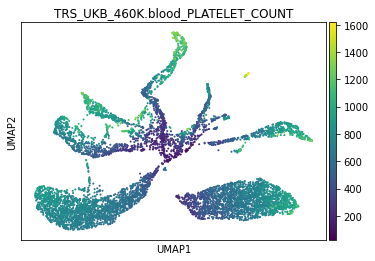

Brain_Non-Myeloid


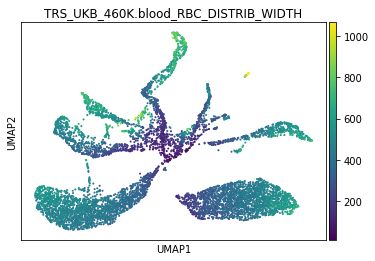

Brain_Non-Myeloid


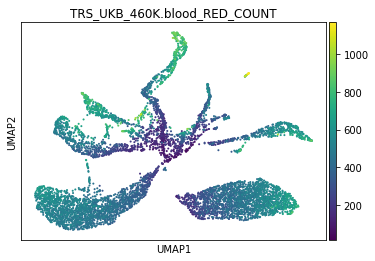

Brain_Non-Myeloid


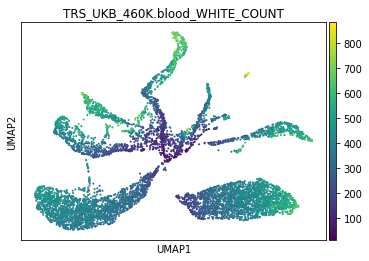

Spleen


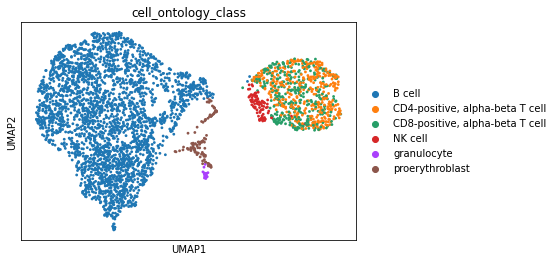

Spleen


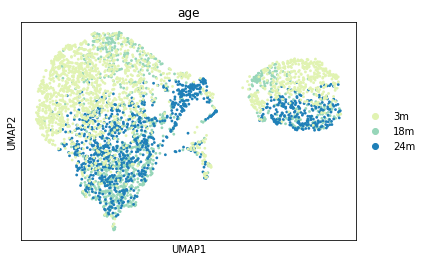

Spleen


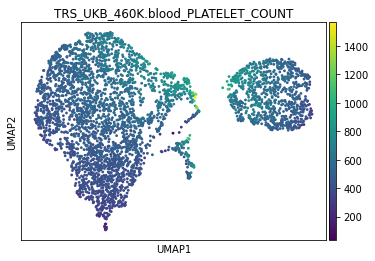

Spleen


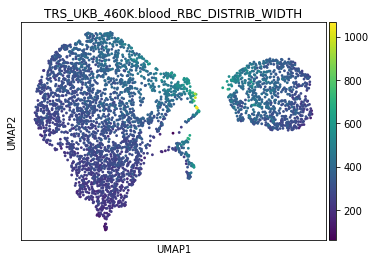

Spleen


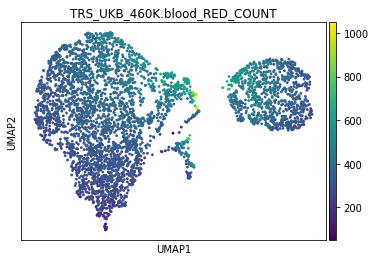

Spleen


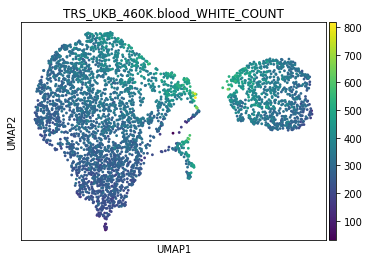

Skin


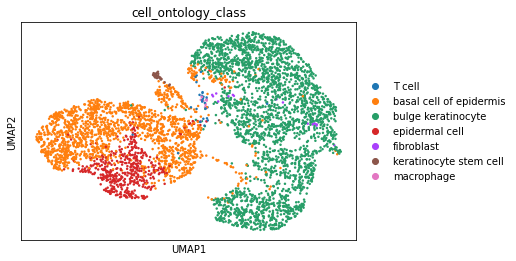

Skin


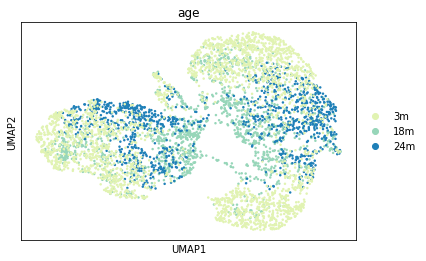

Skin


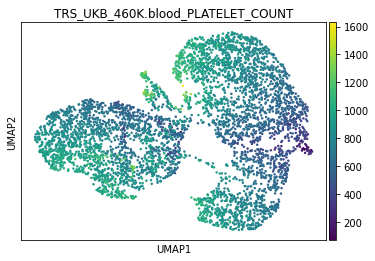

Skin


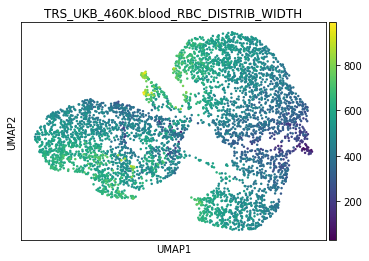

Skin


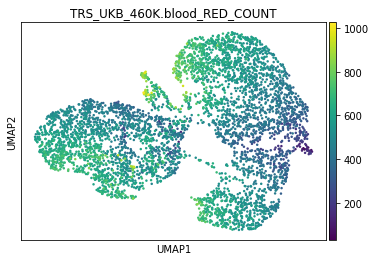

Skin


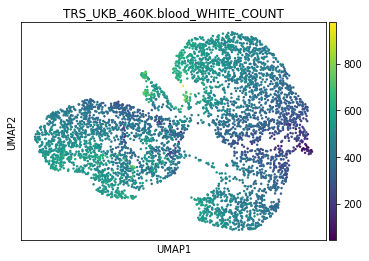

In [75]:
for tissue in tissue_list:
    print(tissue)
    sc.pl.umap(dic_data_facs[tissue], color='cell_ontology_class', save='_%s_celltype.pdf'%tissue)
    print(tissue)
    sc.pl.umap(dic_data_facs[tissue], color='age', save='_%s_age.pdf'%tissue)
    for trait in blood_trait_list:
        print(tissue)
        sc.pl.umap(dic_data_facs[tissue], color='TRS_%s'%trait)